In order to implement autoregressive models, we forecast future observations using a linear combination of past observations of the same variable i.e. to predict 
^
y
t
 which is the future forecast of a variable, we need one or more past observations of 
y
t
 that is 
y
t
−
1
, 
y
t
−
2
, etc.

### **Stationarity**

If a time series is stationary, its statistical properties like mean, variance, and covariance will be the same throughout the series, irrespective of the time at which you observe them.
eg: White Noise
 
Stationary processes are easier to analyze and model because their statistical properties remain constant over time. There will be no trend, seasonality and cyclicity in the series. In other words, if the past observations and future observations follow the same statistical properties i.e. there are no change in mean, variance and covariance then the future observation can be easily predicted. 

### **Stationarity Tests**
**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**
 
Null Hypothesis (H0): The series is stationary
  p−value>0.05
  
Alternate Hypothesis (H1): The series is not stationary
  p−value≤0.05

**Augmented Dickey-Fuller (ADF) Test**
 
Null Hypothesis (H0): The series is not stationary
  p − value > 0.05

Alternate Hypothesis (H1): The series is stationary 
  p−value≤0.05

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [32]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')

In [33]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'beast'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


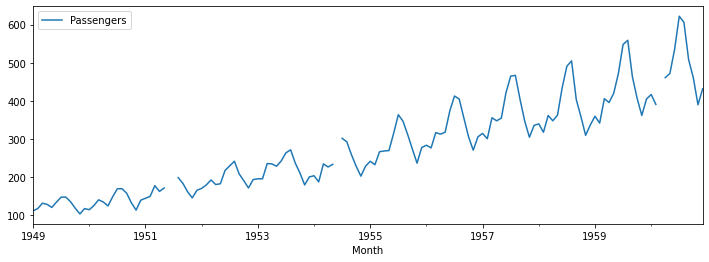

In [34]:
data.Passengers.plot(figsize=(12,4))
plt.legend(loc='beast')

Text(0.5, 1.0, 'Air passenger traffic plot with linear inputation')

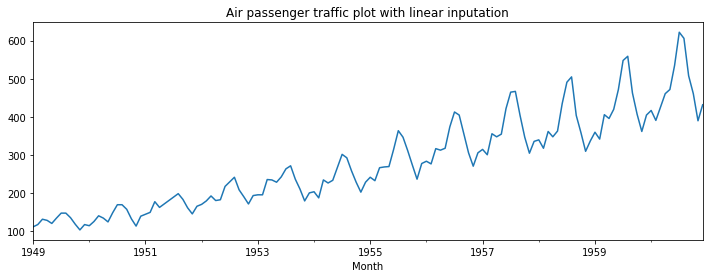

In [35]:
data = data.assign(Passengers = data.Passengers.interpolate(method='linear'))
data['Passengers'].plot(figsize=(12,4))
plt.title('Air passenger traffic plot with linear inputation')

In [36]:
##Augmented Dickey-Fuller (ADF) Test 
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data.Passengers)
print('ADF Statistics ', adf_test[0])
print('Critical value ', adf_test[4])
print('p value ', adf_test[1])

ADF Statistics  0.8946087940823915
Critical value  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
p value  0.9930195647605925


In [37]:
##KPSS Test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data.Passengers)
print('KPSS Statistics ', kpss_test[0])
print('Critical value ', kpss_test[3]['5%'])
print('p value ', kpss_test[1])

KPSS Statistics  1.0520501504573108
Critical value  0.463
p value  0.01


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Non-Stationary to Stationary**

The two tools to convert a non-stationary series into stationary series are as follows:

1. Differencing : 
To remove the trend (to make the mean constant) in a time series you use the technique called differencing. As the name suggests, in differencing you compute the differences between consecutive observations. Differencing stabilises the mean of a time series by removing changes in the level of a time series and therefore eliminating (or reducing) trend and seasonality. 
2. Transformation : Here by making the variance constant we can introduce the stationarity. There can be many transformation methods used to make a non-stationary series stationary but here, we are discussing the Box-Cox transformation. 



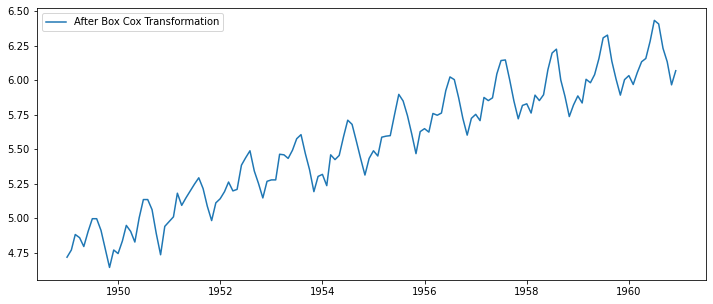

In [38]:
## Box-Cox transformation
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data.Passengers, lmbda=0), index=data.index)
plt.figure(figsize=(12,5))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')

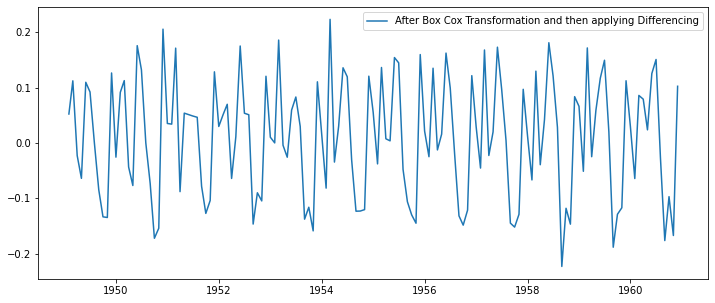

In [39]:
## Differnecing on above to remove the trend.
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and then applying Differencing')
plt.legend(loc='best')

In [40]:
## It appears visually data is stationary, we can perform the test to verify the same.
## So Box-Cox Transformation makes the variance constant in a Time series and Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

### **ACF and PACF**
Autocorrelation is capturing the relationship between observations 
yt at time t and  yt−k
 at time k time period before t. In simpler words, autocorrelation helps us to know how a variable is influenced by its own lagged values. We will look at two Autocorrelation measures here:

1. Autocorrelation function (ACF)
 
    The autocorrelation function tells about the correlation between an observation with its lagged values. It helps you to determine which lag of the observation is influencing it the most. The other interesting thing to notice is that the autocorrelation function captures both direct and indirect relationships between the variables. eg : ACF when calculated between yt and yt+1 here correlation between yt and yt+1 is captured. And when we calculate 2nd level correlation i.e yt and yt+2 ACF will capture the direct correlation between these two and also indirect correlation between yt and yt+2 via yt+1. To avoid this indirect correlation we can use PACF 

 
2. Partial autocorrelation function (PACF)

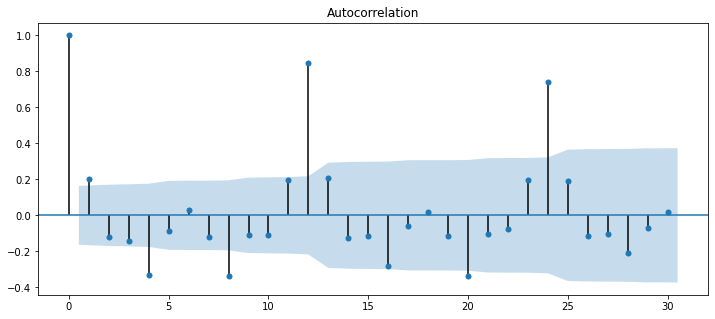

In [41]:
##ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,5))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

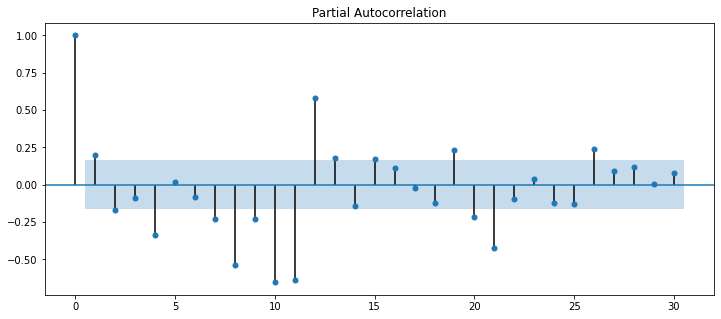

In [42]:
##PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,5))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

### **Simple Auto Regressive model(AR)**

The Simple Auto Regressive model predicts the future observation as linear regression of one or more past observations. In simpler terms, the simple autoregressive model forecasts the dependent variable (future observation) when one or more independent variables are known (past observations). This model has a parameter ‘p’ called lag order. Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points. Select p as the highest lag where partial autocorrelation is significantly high

In [43]:
## Test-Train split for AR Model

In [44]:
train_len=110;
train_boxcox = data_boxcox[:train_len]
test_boxcox = data_boxcox[train_len:]
train_boxcox_diff = data_boxcox_diff[:train_len-1]
test_boxcox_diff = data_boxcox_diff[train_len-1:]

In [45]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009510
ar.L1.y    0.170709
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['AR_prediction_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['AR_prediction_boxcox'] = y_hat_ar['AR_prediction_boxcox_diff'].cumsum()
y_hat_ar['AR_prediction_boxcox'] = y_hat_ar['AR_prediction_boxcox'].add(data_boxcox[0])
y_hat_ar['AR_prediction'] = np.exp(y_hat_ar['AR_prediction_boxcox'])

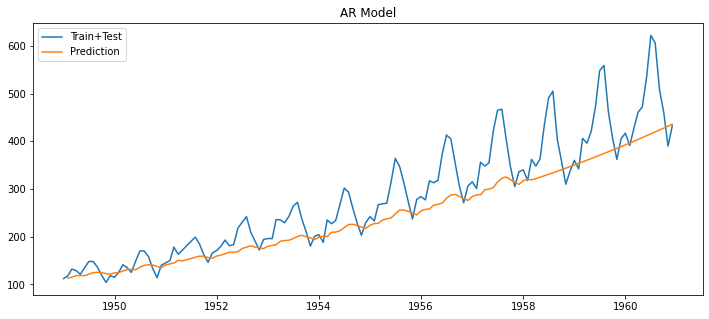

In [47]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_ar['AR_prediction'], label='Prediction')
plt.legend(loc='best')
plt.title('AR Model')
plt.show()

### **Moving Average Model (MA)**
The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.


In [48]:
MA_model = ARIMA(train_boxcox_diff, order=(0,0,1))
model_fit = MA_model.fit()
print(model_fit.params)

const      0.009441
ma.L1.y    0.268106
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
##Recover the original timeseries forecast
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['original_ma'] = np.exp(y_hat_ma['ma_forecast'])

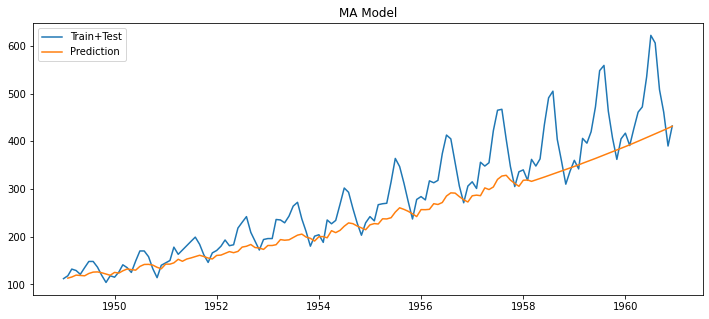

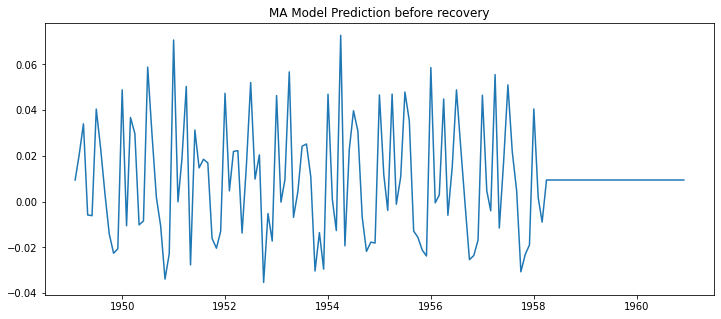

In [50]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_ma['original_ma'], label='Prediction')
plt.legend(loc='best')
plt.title('MA Model')
plt.show()
plt.figure(figsize=(12,5))
plt.title('MA Model Prediction before recovery')
plt.plot(y_hat_ma['ma_forecast_boxcox_diff'], label='Prediction before recovery')

### **Auto Regressive Moving Average (ARMA)**
This model brings together the two pars AR and MA.
ARMA (1,1) equation: For p = 1 and q=1 
*y=β0+β1*St−1+ϕ1*εt−1*


In [51]:
##ARMA(1,1)
model = ARIMA(train_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009641
ar.L1.y   -0.517767
ma.L1.y    0.789534
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [52]:
##Recover the original timeseries forecast
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['original_arma'] = np.exp(y_hat_arma['arma_forecast'])

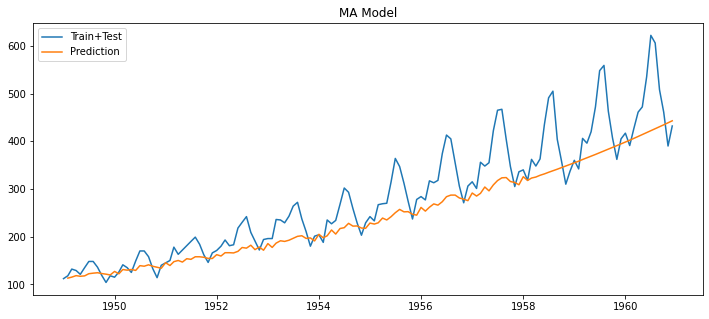

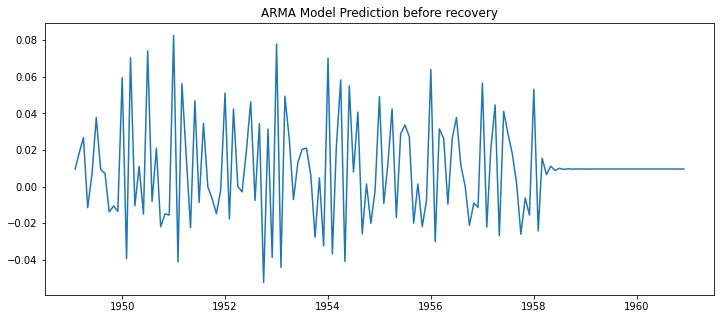

In [53]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_arma['original_arma'], label='Prediction')
plt.legend(loc='best')
plt.title('MA Model')
plt.show()
plt.figure(figsize=(12,5))
plt.title('ARMA Model Prediction before recovery')
plt.plot(y_hat_arma['arma_forecast_boxcox_diff'], label='Prediction before recovery')
##This also doesnt capture the seasonality and its underforecasted.

### **Auto Regressive Integrated Moving Average (ARIMA)**
All the previous regression model had assumption that time series is sataionary (mean and variance is same). ARIMA helps models a series with the trend. It has an embedded parameter that difference the series to remove the trend and later integrate it into the original series.

**Steps of ARIMA model**

1. Original time series is differenced to make it stationary
2. Differenced series is modeled as a linear regression of
    1.One or more past observations
    2.Past forecast errors
3. ARIMA model has three parameters
    1.p: Highest lag included in the regression model
    2.d: Degree of differencing to make the series stationary
    3.q: Number of past error terms included in the regression model
Here the new parameter introduced is the ‘I’ part called integrated. It removes the trend (non-stationarity) and later integrates the trend to the original series.

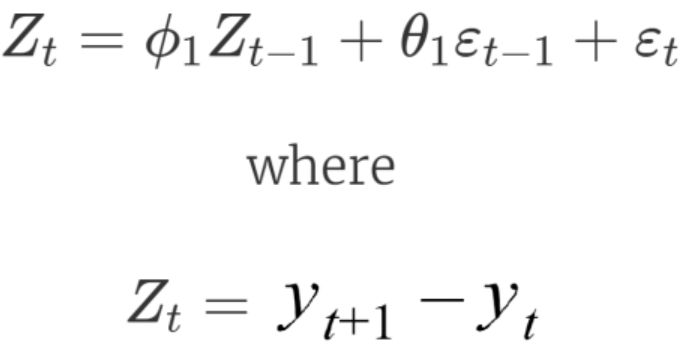

To determine the parameters ‘p’, ‘d’ and ‘q’

For ‘d’: Select d as the order of difference required to make the original time series stationary. We can verify if this differenced series is stationary or not by using the stationarity tests: ADF or KPSS test.
 
For ‘p’ and ‘q’: Plot ACF and PACF of the 1st order differenced time series. Find the value of ‘p’ and ‘q’ as discussed previously with the earlier Auto Regressive Models.
The last step in the ARIMA model is to recover the original time series forecast. 

In [54]:
##ARIMA(1,1,1)
##Note that we are passing train_boxcox, because ARIMA handles the trend using difference menthod by itself.
model = ARIMA(train_boxcox, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.009641
ar.L1.D.y   -0.517767
ma.L1.D.y    0.789534
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
##Recover the original timeseries forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['original_arima'] = np.exp(y_hat_arima['arima_forecast'])

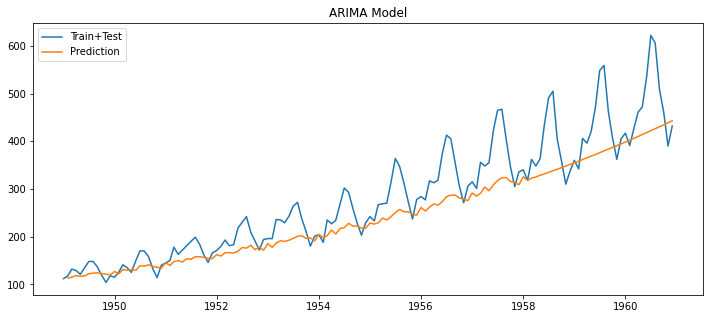

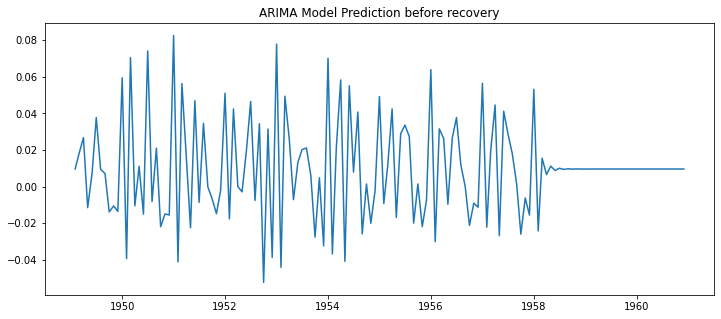

In [56]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_arima['original_arima'], label='Prediction')
plt.legend(loc='best')
plt.title('ARIMA Model')
plt.show()
plt.figure(figsize=(12,5))
plt.title('ARIMA Model Prediction before recovery')
plt.plot(y_hat_arima['arima_forecast_boxcox_diff'], label='Prediction before recovery')
##This also doesnt capture the seasonality and its underforecasted.

### **Seasonal Auto Regressive Integrated Moving Average (SARIMA)**
This autoregressive model that captures seasonality as well. SARIMA brings all the features of an ARIMA model with an extra feature - seasonality. 

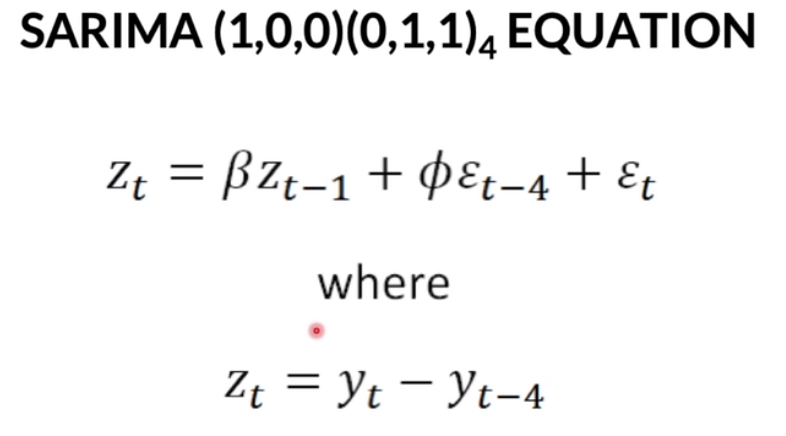

The parameters ‘p’, ‘d’, ‘q’ and ‘P’, ‘D’, ‘Q’: 

**Non-seasonal elements**
1. p: Trend autoregression order
2. d: Trend difference order
3. q: Trend moving average order
**Seasonal elements**
4. m: The number of time steps for a single seasonal period
5. P: Seasonal autoregressive order
6. D: Seasonal difference order
7. Q: Seasonal moving average order



In [57]:
##SARIM
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.363184
ma.L1      -0.673298
ar.S.L12   -0.044514
ma.S.L12   -0.546623
sigma2      0.001395
dtype: float64


In [58]:
##Recover the original timeseries forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_boxfox__forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_boxfox__forecast'])

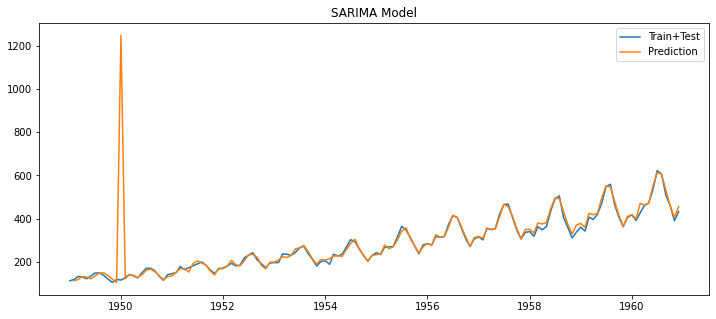

In [59]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_sarima['sarima_forecast'], label='Prediction')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

### **SARIMAX**
SARIMAX has three components:

**Non-seasonal elements**
Models future observation as a linear regression of past observations and past forecast errors.
Performs differencing to make time-series stationary.
 
**Seasonal elements**
Models seasonality as the linear regression of past observations and past forecast errors from previous seasons.
Perform seasonal differencing to make time-series stationary over seasons.
 
**Exogenous variable**
Models future observations as linear regression of external variable.
 
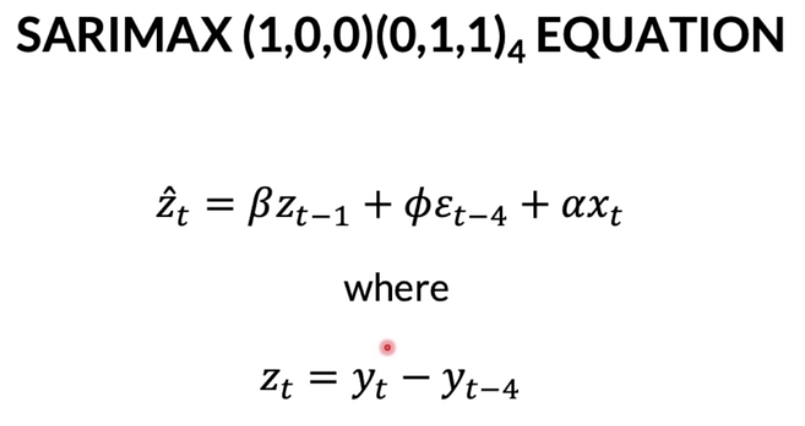

The parameters ‘p’, ‘d’, ‘q’ and ‘P’, ‘D’, ‘Q’ will be the same as 
SARIMA(p,d,q)(P,D,Q)m.

**Determining parameter values**
 
1. PACF plots to determine non-seasonal ‘p’ value
2. ACF plots to identify non-seasonal ‘q’ value
3. Use stationarity tests to determine the  value 'd'
4. Use grid search to choose optimal seasonal P, D and Q parameter values


In [61]:
##SARIMAX
promo = pd.read_csv('promotion.csv', header=None)
promo.columns = ['Month', 'Event']
promo['Month'] = pd.to_datetime(promo.Month, format='%Y-%m')
promo = promo.set_index('Month')

In [62]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [64]:
model = SARIMAX(train_boxcox, order=(1,1,1),seasonal_order=(1,1,1,12), exog=promo_train)
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Event       0.038883
ar.L1       0.580561
ma.L1      -0.845655
ar.S.L12   -0.075344
ma.S.L12   -0.593404
sigma2      0.001297
dtype: float64


In [65]:
##Recover the original timeseries forecast
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

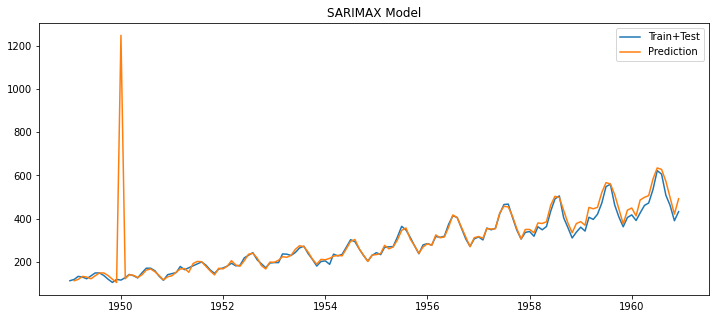

In [66]:
plt.figure(figsize=(12,5))
plt.plot(data.Passengers, label='Train+Test')
plt.plot(y_hat_sarimax['sarimax_forecast'], label='Prediction')
plt.legend(loc='best')
plt.title('SARIMAX Model')
plt.show()

In [ ]:
##Refference : https://otexts.com/fpp2/simple-methods.html
## https://people.duke.edu/~rnau/411arim.htm
## 